In [1]:
!pip install docx2txt
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  Type of File Format

In [ ]:
!pip install textract
import os
import textract

directory = '/content/drive/MyDrive/project p390'
file_path = []
category = []

for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        file_path.append(textract.process(os.path.join(directory, i)))
        category.append(i.split('.')[0])

In [6]:
doc_file = []
docx_file = []
pdf_file = []
folder_name = []

In [7]:
# Corrected code:
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [8]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [9]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [10]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

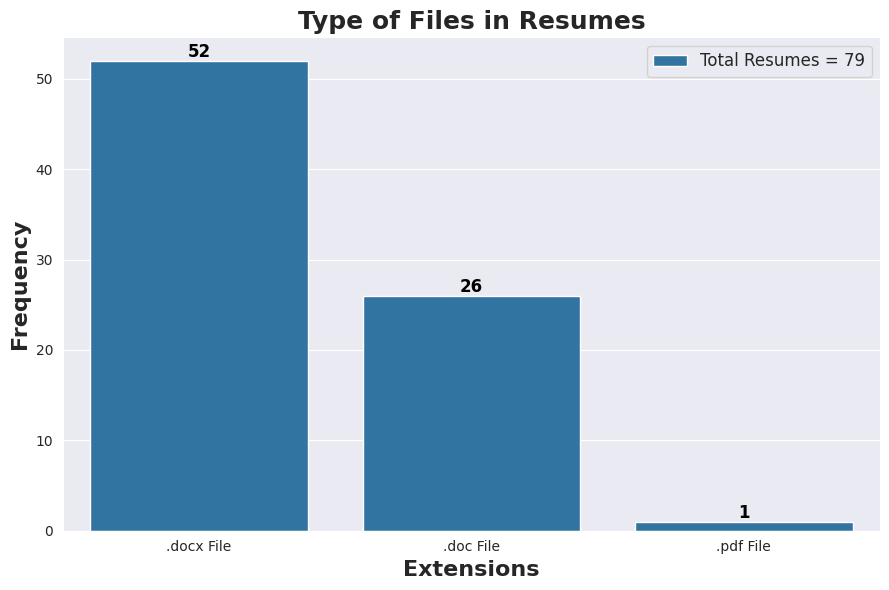

In [11]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

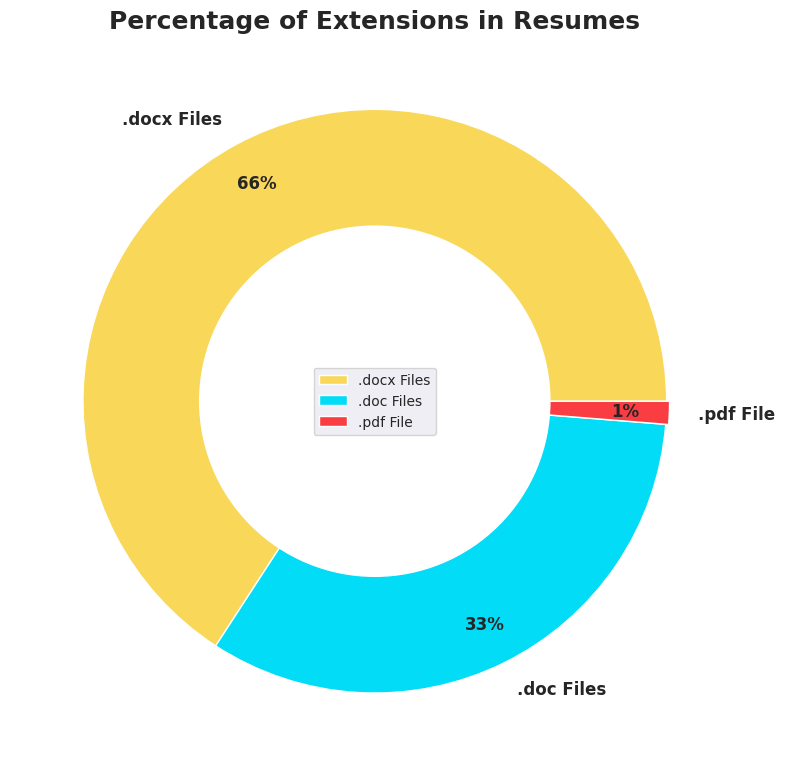

In [12]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

## Reading a Resume File

In [17]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/project p390/Peoplesoft resumes/Peoplesoft Admin_SirazuddinMohammad.docx'))

SIRAZUDDIN M

 Bangalore, INDIA 





SIRAZUDDIN M

 Bangalore, INDIA 





























PROFILE SUMMARY



I have overall 6.8 years’ experience as PeopleSoft Administrator. Installed PeopleTools 8.55 from the scratch including its products. 

Experience in Peopletools 8.51, 8.54.08, 8.55.07&Application 9.0 and 9.2 (HRMS/FSCM). Deterministic approach towards problem solving & troubleshooting.

Proficient in Integration Broker.

Upgraded FSCM and HCM applications to PeopleTools 8.55.07 from PeopleTools 8.54.08.



EDUCATION



Graduated B-Tech in Electronics and Communication Engg. from M.V.G.R College of Engineering, Vizianagaram(JNTUK) with an aggregate of 68.93%.

Achieved 90% marks in 12th standard. Scored 86% in 10th standard.



ACHIEVEMENTS

Awarded Bravo in 2015 Q3, 2016 Q1 and Pat on Back in Q2, 2016, Q1, 2017 in Techahindra.

Awarded Associate of the month award and Innovator of the month (1 time). Awarded spot and pat on back in Capgemini



WORK EXPERIENCE

CAPGEM

##  Data Exploration

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Resumes.csv to Cleaned_Resumes.csv


In [22]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Clean_Text
0,Internship,name ravali curriculum vitae specialization co...
1,Internship,susovan bag seeking challenging position field...
2,Peoplesoft Admin,anubhav kumar singh core competencies scriptin...
3,Peoplesoft Admin,ananda rayudu profile summary years experience...
4,Peoplesoft Admin,peoplesoft database administrator gangareddy p...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


###  N-grams
* **N-grams analyses are often used to see which words often show up together.**

In [24]:
!pip install textblob

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(1)[:20]

[WordList(['susovan']),
 WordList(['bag']),
 WordList(['seeking']),
 WordList(['challenging']),
 WordList(['position']),
 WordList(['field']),
 WordList(['science']),
 WordList(['technology']),
 WordList(['utilize']),
 WordList(['skills']),
 WordList(['organization']),
 WordList(['individual']),
 WordList(['growth']),
 WordList(['enhance']),
 WordList(['knowledge']),
 WordList(['academic']),
 WordList(['learning']),
 WordList(['give']),
 WordList(['best']),
 WordList(['organization'])]

In [27]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(2)[:20]

[WordList(['susovan', 'bag']),
 WordList(['bag', 'seeking']),
 WordList(['seeking', 'challenging']),
 WordList(['challenging', 'position']),
 WordList(['position', 'field']),
 WordList(['field', 'science']),
 WordList(['science', 'technology']),
 WordList(['technology', 'utilize']),
 WordList(['utilize', 'skills']),
 WordList(['skills', 'organization']),
 WordList(['organization', 'individual']),
 WordList(['individual', 'growth']),
 WordList(['growth', 'enhance']),
 WordList(['enhance', 'knowledge']),
 WordList(['knowledge', 'academic']),
 WordList(['academic', 'learning']),
 WordList(['learning', 'give']),
 WordList(['give', 'best']),
 WordList(['best', 'organization']),
 WordList(['organization', 'skills'])]

In [28]:
TextBlob(resume_data['Clean_Text'][1]).ngrams(3)[:20]

[WordList(['susovan', 'bag', 'seeking']),
 WordList(['bag', 'seeking', 'challenging']),
 WordList(['seeking', 'challenging', 'position']),
 WordList(['challenging', 'position', 'field']),
 WordList(['position', 'field', 'science']),
 WordList(['field', 'science', 'technology']),
 WordList(['science', 'technology', 'utilize']),
 WordList(['technology', 'utilize', 'skills']),
 WordList(['utilize', 'skills', 'organization']),
 WordList(['skills', 'organization', 'individual']),
 WordList(['organization', 'individual', 'growth']),
 WordList(['individual', 'growth', 'enhance']),
 WordList(['growth', 'enhance', 'knowledge']),
 WordList(['enhance', 'knowledge', 'academic']),
 WordList(['knowledge', 'academic', 'learning']),
 WordList(['academic', 'learning', 'give']),
 WordList(['learning', 'give', 'best']),
 WordList(['give', 'best', 'organization']),
 WordList(['best', 'organization', 'skills']),
 WordList(['organization', 'skills', 'ccna'])]

In [29]:
resume_data['Clean_Text']

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     anubhav kumar singh core competencies scriptin...
3     ananda rayudu profile summary years experience...
4     peoplesoft database administrator gangareddy p...
                            ...                        
74    workday integration consultant name sri krishn...
75    srikanth workday hcm consultant seeking suitab...
76    workday hcm fcm name kumar role workday consul...
77    venkateswarlu workday consultant years experie...
78    vinay kumar workday functional consultant expe...
Name: Clean_Text, Length: 79, dtype: object

###  Top 20 most used words in Resumes
* **Using CountVectorizer**

In [31]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
# Option 1: Use a string
countvec = CountVectorizer(stop_words="english", ngram_range=(1, 2))

# Option 2: Use a list of stopwords
stopwords_list = list(nlp.Defaults.stop_words)
countvec = CountVectorizer(stop_words=stopwords_list, ngram_range=(1, 2))

In [43]:
# Import the stopwords list from NLTK
from nltk.corpus import stopwords

# Create the CountVectorizer object
countvec = CountVectorizer(stop_words=stopwords.words("english"), ngram_range=(1, 2))

In [45]:
ngrams = countvec.fit_transform(resume_data['Clean_Text']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [46]:
df_ngram

,Frequency,Unigram_Bigram
0,597,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
...,...,...
25653,1,abilities telugu
25654,1,abilities skills
25655,1,abilities problem
25656,1,abilities good


In [48]:
!mkdir IMG

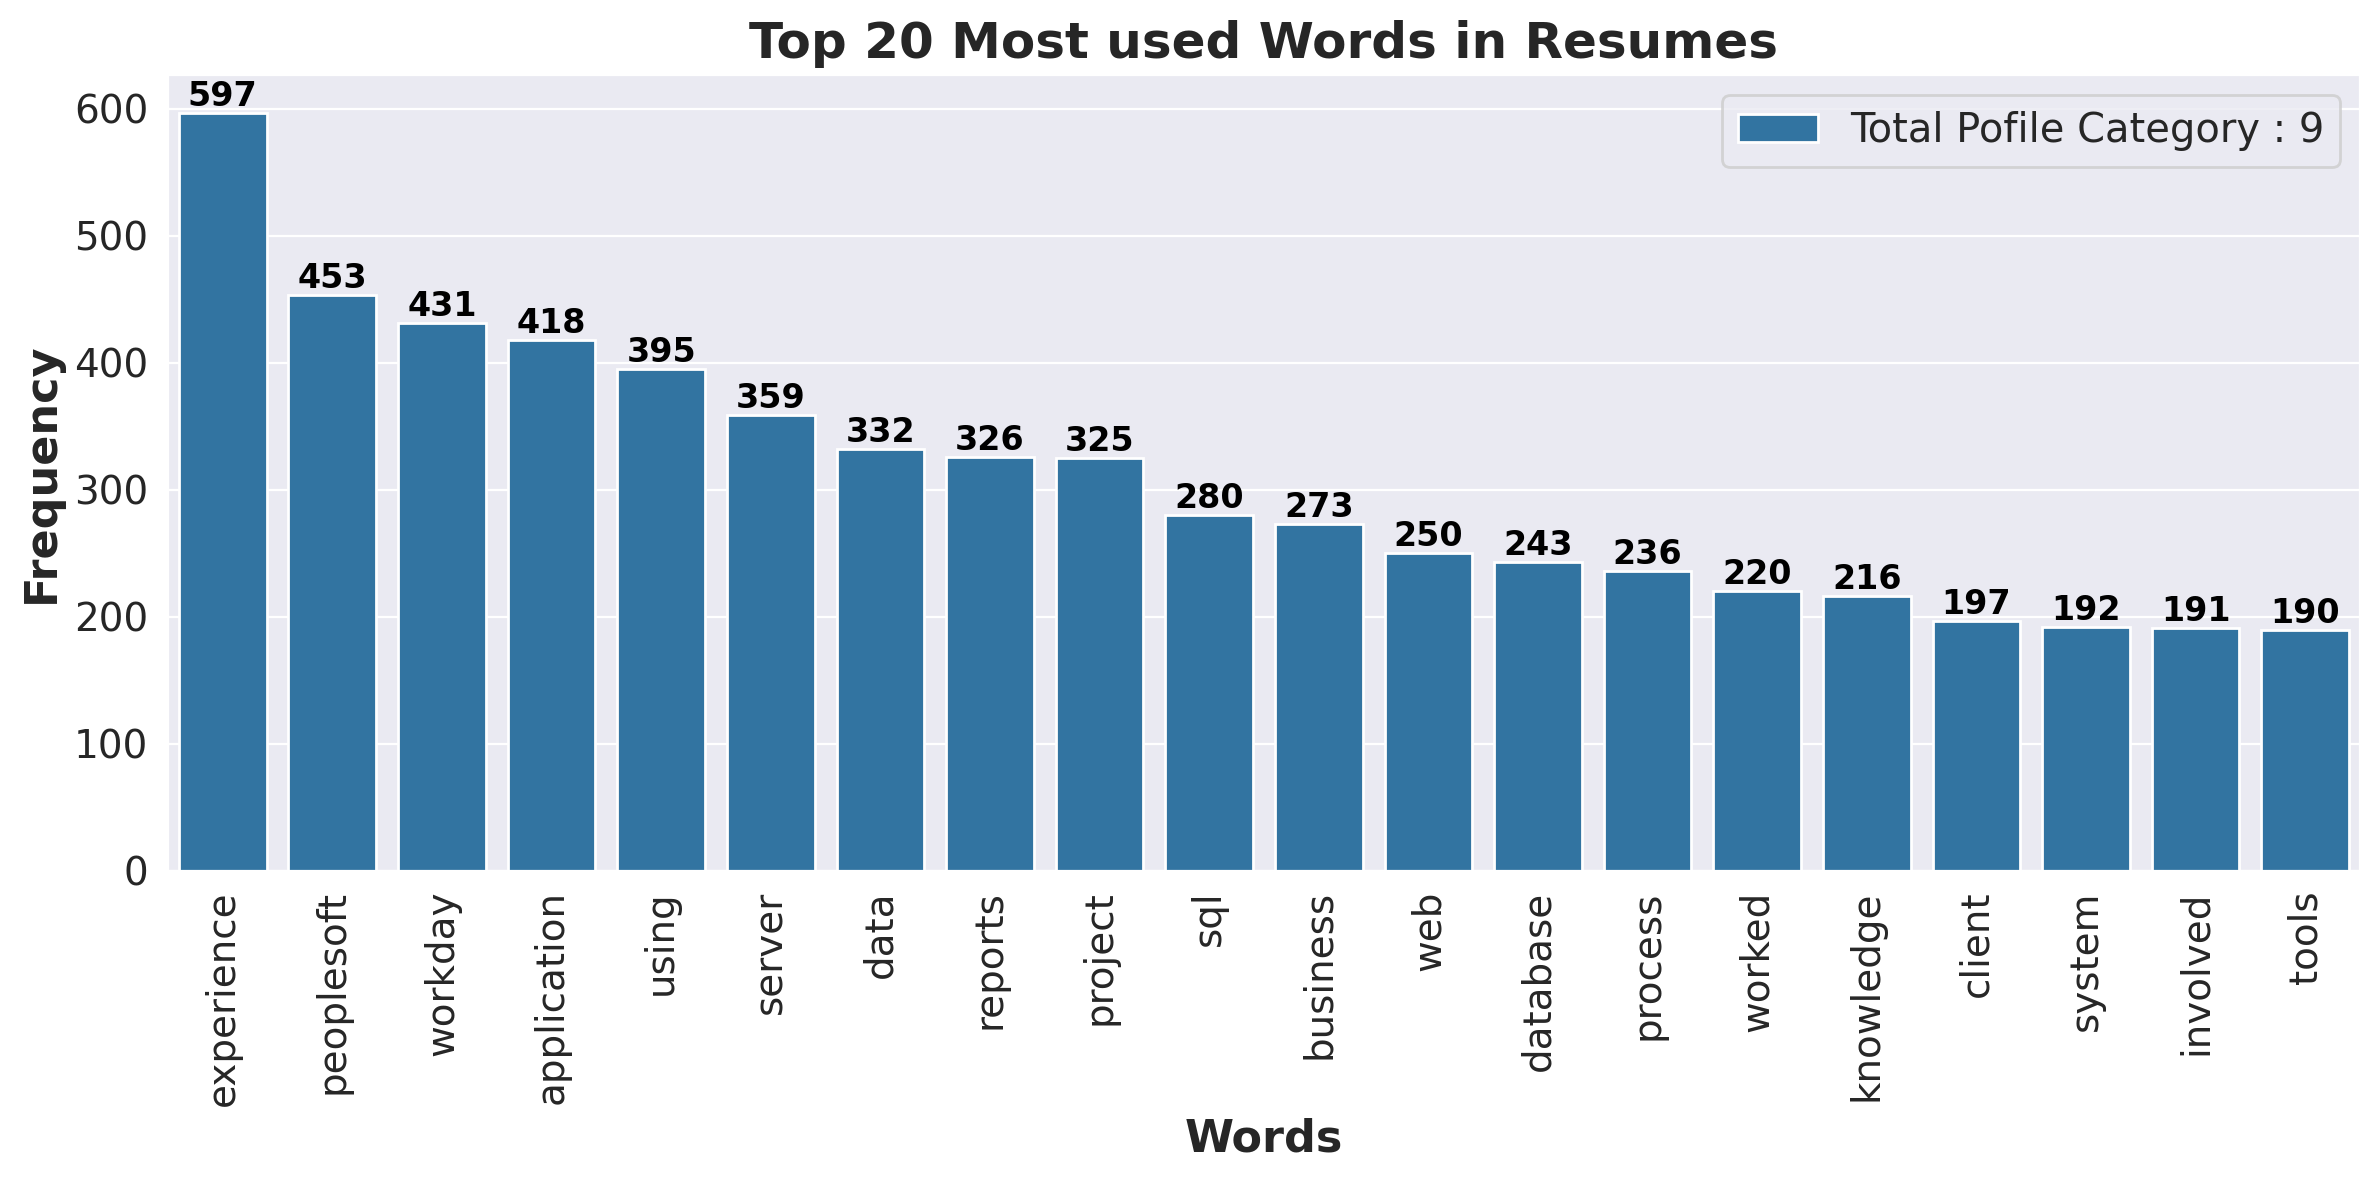

In [49]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar', dpi = 500)

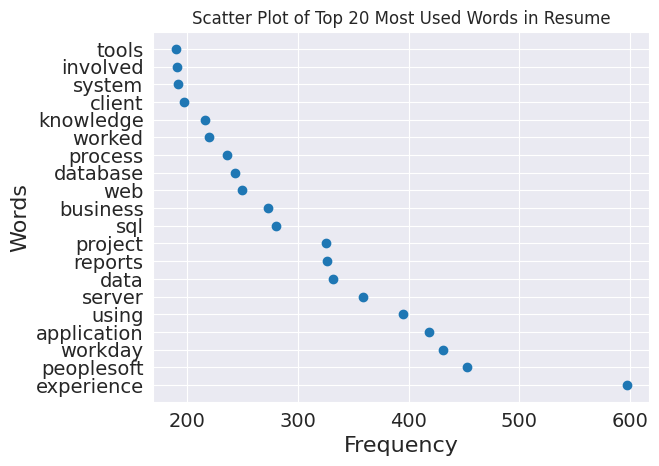

In [54]:
#  plot a scatter for the top 20 most used words in resume

import matplotlib.pyplot as plt

# Get the top 20 most used words
top_words = df_ngram['Unigram_Bigram'].head(20)

# Get the frequency of the top 20 most used words
top_words_frequency = df_ngram['Frequency'].head(20)

# Create a scatter plot
plt.scatter(top_words_frequency,top_words )

# Set the title and axis labels
plt.title('Scatter Plot of Top 20 Most Used Words in Resume')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Show the plot
plt.show()


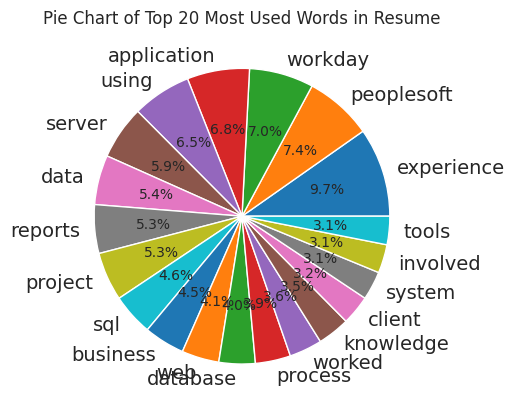

In [55]:
#plot a pie chart for the top 20 most used words in resume

import matplotlib.pyplot as plt
# Get the top 20 most used words
top_words = df_ngram['Unigram_Bigram'].head(20)

# Get the frequency of the top 20 most used words
top_words_frequency = df_ngram['Frequency'].head(20)

# Create a pie chart
plt.pie(top_words_frequency, labels=top_words, autopct='%1.1f%%')

# Set the title
plt.title('Pie Chart of Top 20 Most Used Words in Resume')

# Show the plot
plt.show()


### Using the Word Clowds

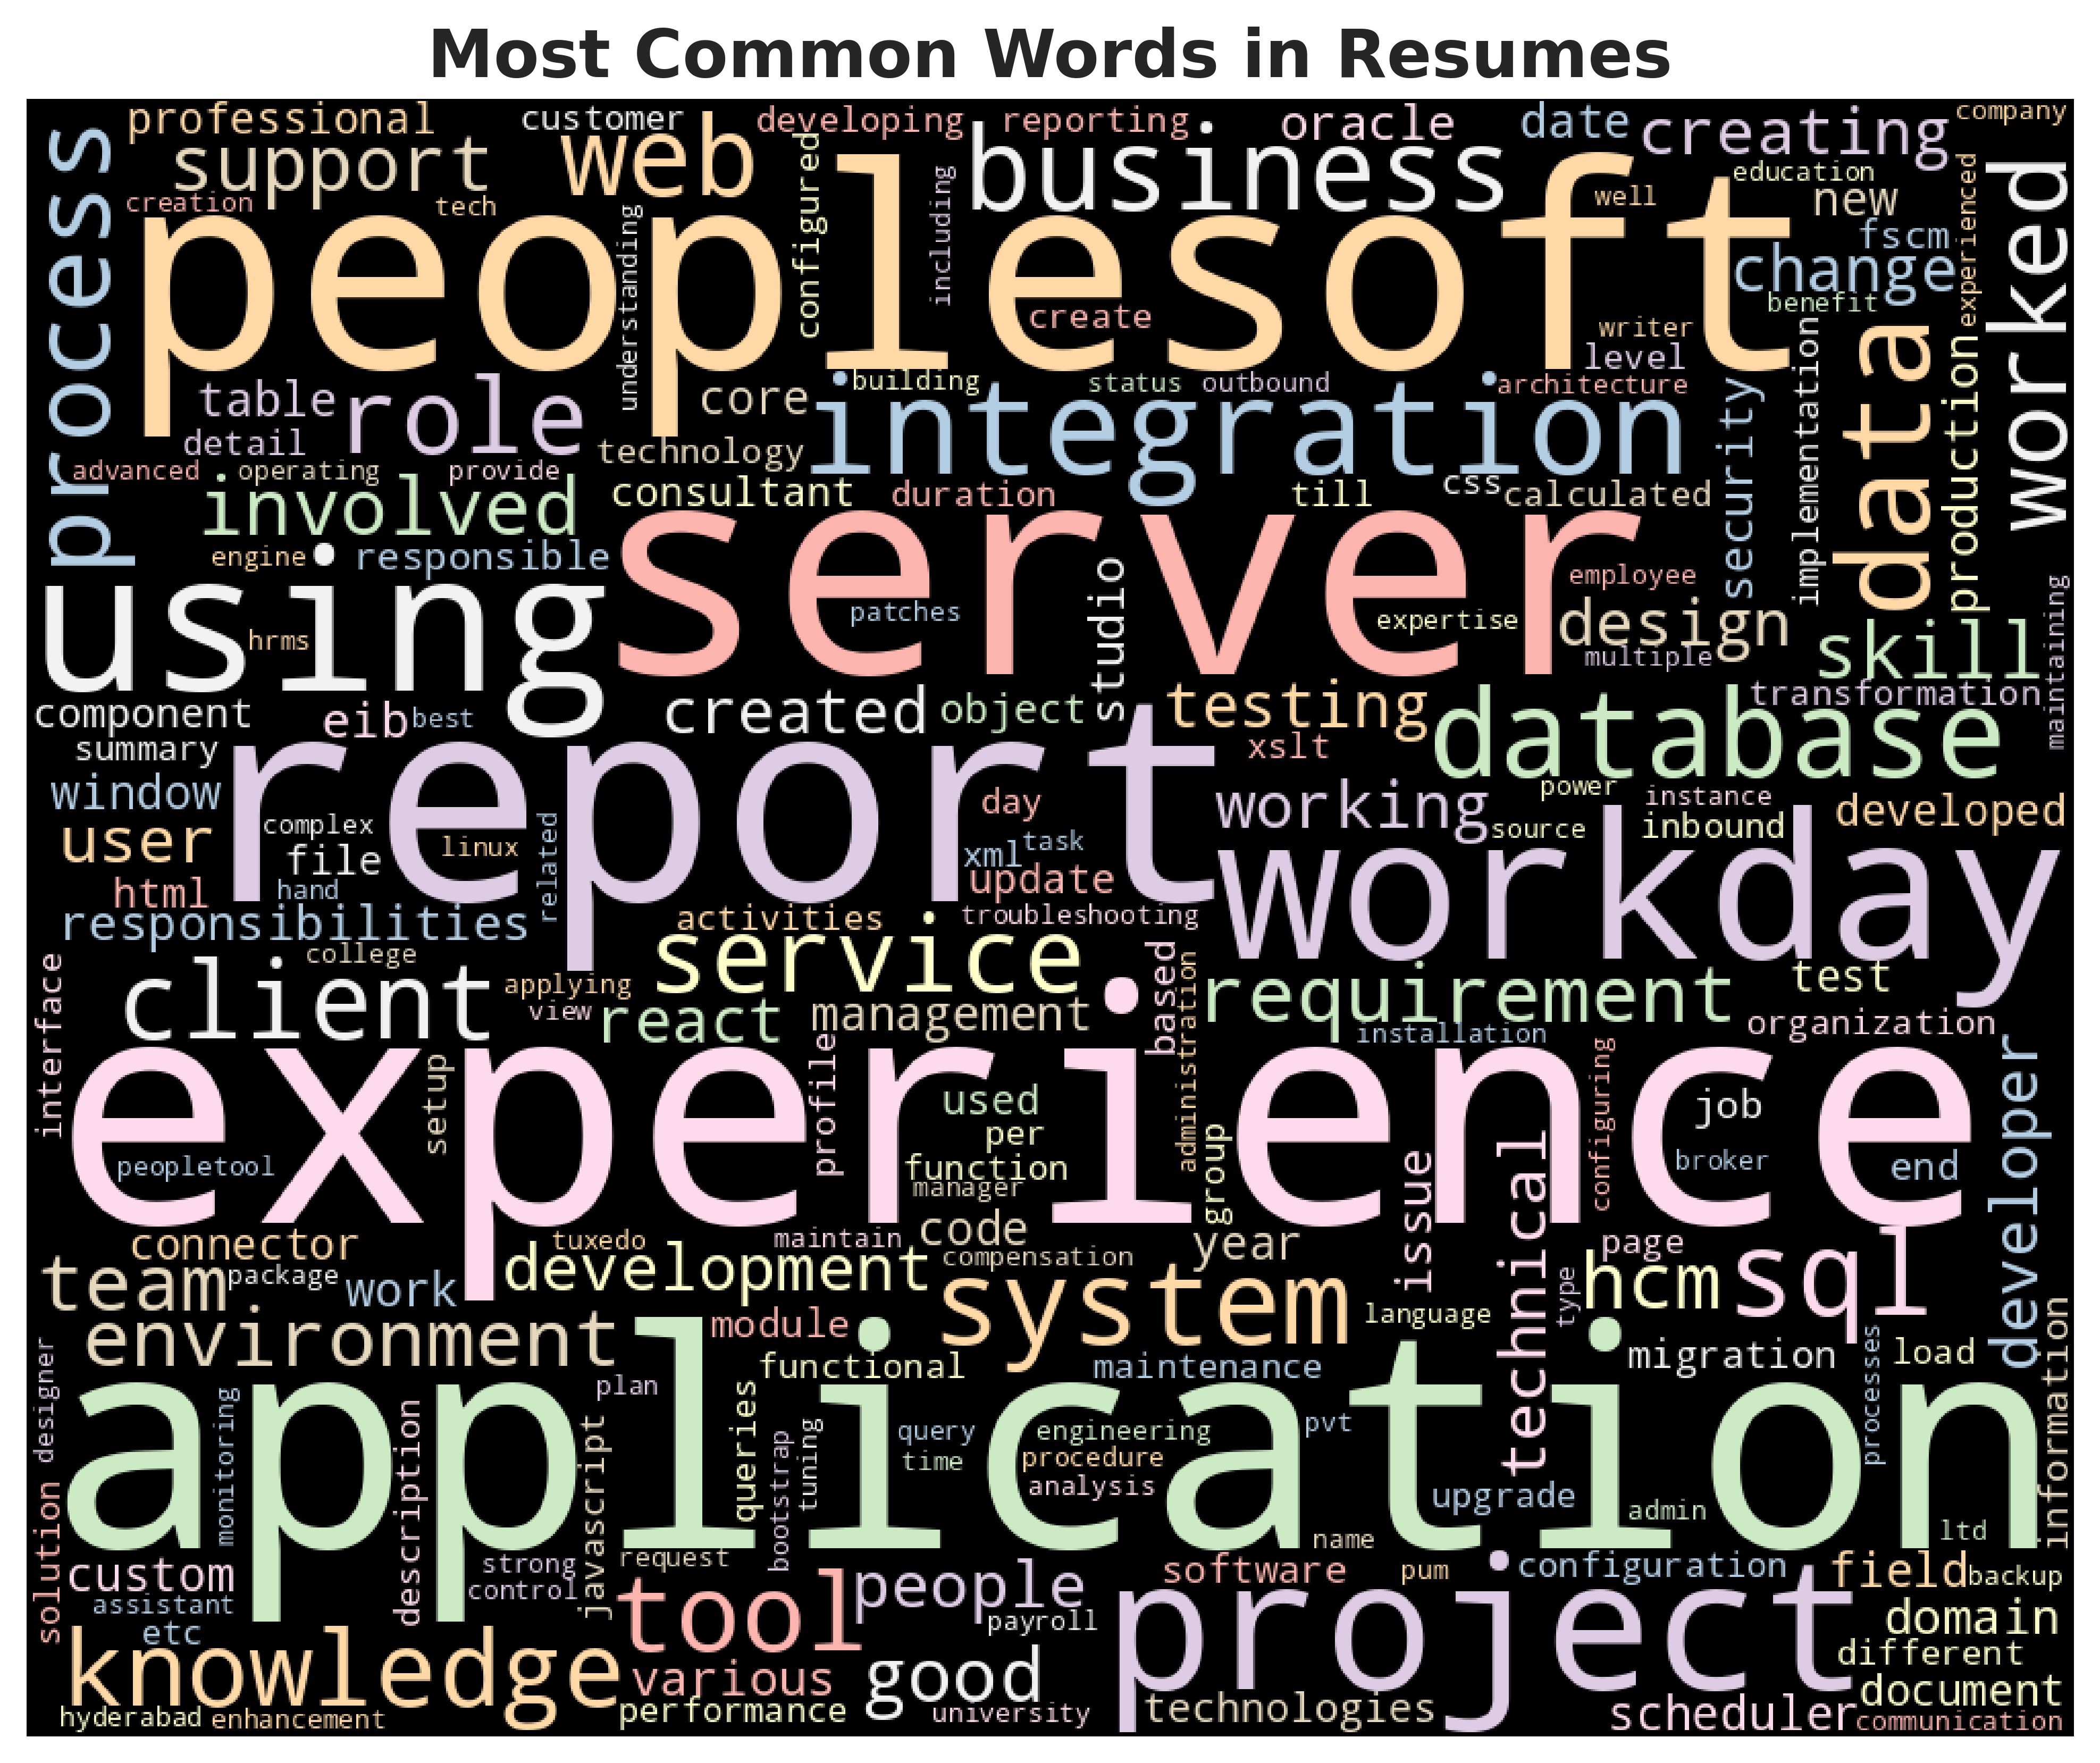

In [50]:
text = " ".join(cat for cat in resume_data.Clean_Text) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()